In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os
from pipeline.utils import read_json, make_folder

# EXP 6: Comparing to models without density optimization

## Read results from disc

In [19]:
datasets = ['cardio', 'meps16']
y_cols = ['Y' for i in range(2)]
sensi_cols = ['C0' for i in range(2)]

seeds = [1, 12345, 6, 2211, 15]
# , 88, 121, 433, 500, 1121, 50, 583, 5278, 100000, 0xbeef, 0xcafe, 0xdead, 0xdeadcafe, 0xdeadbeef, 0xbeefcafe]

In [31]:
df = pd.read_csv(res_path+'cardio/'+'-'.join(['test_violation', str(1), 'noOPT'])+'.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,Y,C0,vio_by_noOPT_G0_L0,vio_by_noOPT_G0_L1,vio_by_noOPT_G1_L0,vio_by_noOPT_G1_L1
0,-0.105686,-0.122181,-0.088238,1,0,1,0,0,0,0,...,1,0,0,1,0,0,0.0,0.0,0.0,0.0
1,-0.161435,-0.057251,-0.088238,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0.0,0.0,0.0,0.0
2,0.071659,0.072610,-0.035180,1,0,1,0,0,1,0,...,1,0,0,1,1,1,0.0,0.0,0.0,0.0
3,-1.207335,-0.057251,-0.088238,1,0,0,1,0,1,0,...,1,0,0,1,1,0,0.0,0.0,0.0,0.0
4,-0.604349,-0.057251,-0.088238,1,0,1,0,0,1,0,...,1,0,0,1,0,1,0.0,0.0,0.0,0.0


In [33]:
sum(df['vio_by_noOPT_G0_L0'])

47.41030200078001

In [34]:
sum(df['vio_by_noOPT_G0_L1'])

9.498725258710158

In [35]:
sum(df['vio_by_noOPT_G1_L0'])

43.964427611504625

In [36]:
sum(df['vio_by_noOPT_G1_L1'])

36.113104112249346

In [20]:
# extracting results from SingleCC without optimization
# exp_setting = 'Single_eval'
exp_setting = 'Multi_eval'
exp_suffix = 'noOPT'

res_path = 'intermediate/models/'
group_eval_metrics = ['AUC', 'ACC', 'SR', 'BalAcc']
overall_metrics = ['BalAcc', 'DI', 'EQDiff', 'AvgOddsDiff', 'SPDiff']
# settings = ['A', 'C']
settings = ['A', 'F']

eval_path = 'intermediate/evals/'

eval_file = exp_setting+'_'+exp_suffix+'_data'+str(len(datasets))+'_n'+str(len(seeds))+'.csv'


all_eval_files = list(filter(lambda x: not os.path.isdir(os.path.join(eval_path, x)), os.listdir(eval_path)))
if not eval_file in all_eval_files:
    single_no_df = pd.DataFrame(columns=['data', 'seed', 'setting', 'group', 'metric', 'value'])

    for data_name in datasets:
        for seed in seeds:
#             eval_res = read_json(res_path+data_name+'/'+'-'.join([exp_setting, str(seed), 'SingleCC', exp_suffix]))
            eval_res = read_json(res_path+data_name+'/'+'-'.join([exp_setting, str(seed), 'orig', exp_suffix]))
            for setting in settings:
                for group in ['all', 'G0', 'G1']:
                    base = [data_name, seed, setting, group]
                    for metric_i in group_eval_metrics:
                        single_no_df.loc[single_no_df.shape[0]] = base + [metric_i, eval_res[setting][group][metric_i]]
                for metric_i in overall_metrics:
                    single_no_df.loc[single_no_df.shape[0]] = [data_name, seed, setting, 'all'] + [metric_i, eval_res[setting]['all'][metric_i]]

    single_no_df.to_csv(eval_path+eval_file, index=False)
    print('Save evaluation results at {}'.format(eval_path+eval_file))
else:
    single_no_df = pd.read_csv(eval_path+eval_file)
    print('Read evaluation results from {}'.format(eval_path+eval_file))
    

Save evaluation results at intermediate/evals/Multi_eval_noOPT_data2_n5.csv


In [21]:
# extracting results from SingleCC with OPT
# exp_setting = 'Single_eval'
# exp_suffix = 'SingleCC'
exp_setting = 'Multi_eval'
exp_suffix = 'orig'

res_path = 'intermediate/models/'
group_eval_metrics = ['AUC', 'ACC', 'SR', 'BalAcc']
overall_metrics = ['BalAcc', 'DI', 'EQDiff', 'AvgOddsDiff', 'SPDiff']
# settings = ['A', 'C']
settings = ['A', 'F']

eval_path = 'intermediate/evals/'

eval_file = exp_setting+'_'+exp_suffix+'_data'+str(len(datasets))+'_n'+str(len(seeds))+'.csv'


all_eval_files = list(filter(lambda x: not os.path.isdir(os.path.join(eval_path, x)), os.listdir(eval_path)))
if not eval_file in all_eval_files:
    single_df = pd.DataFrame(columns=['data', 'seed', 'setting', 'group', 'metric', 'value'])

    for data_name in datasets:
        for seed in seeds:
            eval_res = read_json(res_path+data_name+'/'+'-'.join([exp_setting, str(seed), exp_suffix]))
            for setting in settings:
                for group in ['all', 'G0', 'G1']:
                    base = [data_name, seed, setting, group]
                    for metric_i in group_eval_metrics:
                        single_df.loc[single_df.shape[0]] = base + [metric_i, eval_res[setting][group][metric_i]]
                for metric_i in overall_metrics:
                    single_df.loc[single_df.shape[0]] = [data_name, seed, setting, 'all'] + [metric_i, eval_res[setting]['all'][metric_i]]

    single_df.to_csv(eval_path+eval_file, index=False)
    print('Save evaluation results at {}'.format(eval_path+eval_file))
else:
    single_df = pd.read_csv(eval_path+eval_file)
    print('Read evaluation results from {}'.format(eval_path+eval_file))
    

Save evaluation results at intermediate/evals/Multi_eval_orig_data2_n5.csv


In [22]:
# for visualization change the values to be consistent with the order that higher is better
def normalize_fairness_measures(x):
    if x.iloc[0] in ['EQDiff', 'AvgOddsDiff', 'SPDiff']: # difference change to 1-abs(x)
        return 1-abs(x.iloc[1])
    
    elif x.iloc[0] == 'DI':
        if x.iloc[1] > 1:
            return min(x.iloc[1], 1/x.iloc[1])
        else:
            return x.iloc[1]
    else:# other metrics
        return x.iloc[1]
def add_vis_flag(x):
    if x.iloc[0] in ['EQDiff', 'AvgOddsDiff', 'SPDiff']: # difference change to 1-abs(x)
        if x.iloc[1] < 0: 
            return 0
        else: # G0 has better outcome
            return 1
    
    elif x.iloc[0] == 'DI':
        if x.iloc[1] > 1:
            return 1
        else:
            return 0
    else:# other metrics
        return 0


In [23]:
# read merge results 
eval_file = 'Exp6_noOPT_Multi_data'+str(len(datasets))+'_n'+str(len(seeds))+'.csv'
all_eval_files = list(filter(lambda x: not os.path.isdir(os.path.join(eval_path, x)), os.listdir(eval_path)))
if not eval_file in all_eval_files:
    single_cc = single_df[single_df['setting']== 'F']
    single_cc['setting'] = 'yes'
    single_no = single_no_df[single_no_df['setting']== 'F']
    single_no['setting'] = 'no'
    
    eval_df = pd.concat([single_no, single_cc])
    eval_df.reset_index(drop=True, inplace=True)
    eval_df['norm_value'] = eval_df[['metric', 'value']].apply(lambda x: normalize_fairness_measures(x), axis=1)
    eval_df['norm_flag'] = eval_df[['metric', 'value']].apply(lambda x: add_vis_flag(x), axis=1)
    

    eval_df.to_csv(eval_path+eval_file, index=False)
    print('Save evaluation results at {}'.format(eval_path+eval_file))
else:
    eval_df = pd.read_csv(eval_path+eval_file)
    print('Read evaluation results from {}'.format(eval_path+eval_file))

Save evaluation results at intermediate/evals/Exp6_noOPT_Multi_data2_n5.csv


In [24]:
eval_df.head()

,data,seed,setting,group,metric,value,norm_value,norm_flag
0,cardio,1,no,all,AUC,0.721000,0.721000,0
1,cardio,1,no,all,ACC,0.721000,0.721000,0
2,cardio,1,no,all,SR,0.444571,0.444571,0
3,cardio,1,no,all,BalAcc,0.720904,0.720904,0
4,cardio,1,no,G0,AUC,0.743000,0.743000,0


## Draw barplots

In [25]:
def bar_plots(df, vis_name, vis_datasets, vis_metric, vis_settings, 
              legend_names=None, font_label=26, font_legend=18, 
              colors=['#ffffff', '#20603d'], bg_color = '#f3f3f3', 
              x_ticks=None, y_label=None, x_label=None, legend=True, legend_col=2, save_to_disc=False, 
              plot_path = 'intermediate/evals/plots/'):
    
    fig, ax = plt.subplots(1, figsize=(10, 4), dpi=200)
    input_df = df.copy()
    bar_mean = []
    bar_std = []
    dash_filling = []
    x_bars = []
    ind = 0
    for off_i, name in enumerate(vis_datasets):
        vis_df = input_df[(input_df['data']==name) & (input_df['metric']==vis_metric) & (input_df['group']=='all')].copy()
        for setting_i in vis_settings:
            set_df = vis_df[vis_df['setting']==setting_i]
            y_values = np.array(set_df['norm_value'])
            n_reverse = sum(np.array(set_df['norm_flag']))
            if n_reverse > int(len(y_values) * 0.7): # majoirty of cases in which G0 has better outcomes
                dash_filling.append(True)
            else:
                dash_filling.append(False)
            bar_mean.append(np.mean(y_values))
            bar_std.append(np.std(y_values))
            x_bars.append(ind+off_i*2)
                
            ind += 0.83
            print(name, setting_i, np.mean(y_values))
    bplot = ax.bar(x_bars, bar_mean, yerr=bar_std)
    
    n_bars = len(vis_settings)
    for idx, patch in enumerate(bplot):
        patch.set_facecolor(colors[idx % n_bars])
        
        if dash_filling[idx]:
            patch.set_hatch('//')
            patch.set_edgecolor("#cb4154")
        else:
            patch.set_edgecolor("black")
    if legend_names:
        legends = legend_names
    else:
        legends = vis_settings
    # add labels for settings 
    for idx, setting_i, color_i, legend_i in zip(range(len(vis_settings)), vis_settings, colors, legends):
        ax.bar(-2, 1, ec='black', fc=color_i, label=legend_i)

    ax.set_facecolor(bg_color)

    plt.xlim([-1, max(x_bars)+1])
    plt.xticks([(x-1)*5.4+0.5 for x in range(1, len(datasets)+1)])
    if x_ticks:
        locs, labels=plt.xticks();
        plt.xticks(locs, x_ticks, horizontalalignment='center', fontsize=font_label-10, rotation=0);

    plt.ylim([0.0, 1.0])
    plt.yticks(fontsize=font_label);

    if y_label:
        plt.ylabel(y_label, fontsize=font_label)

    if x_label:
        plt.xlabel(x_label, fontsize=font_label)

    if legend:
        plt.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower center", mode="expand", ncol=legend_col, frameon=False, borderaxespad=0, handlelength=0.9, handletextpad=0.3, fontsize=font_label-7)

    if save_to_disc:
        plt.savefig(plot_path+vis_name+'_'+vis_metric+'.pdf', bbox_inches="tight")
        print('Bar plot is saved at ', plot_path+vis_name+'_'+vis_metric+'.pdf')

meps16 no 0.7524806808514013
meps16 yes 0.7522949784312566
cardio no 0.7129994400807802
cardio yes 0.7088307219611929


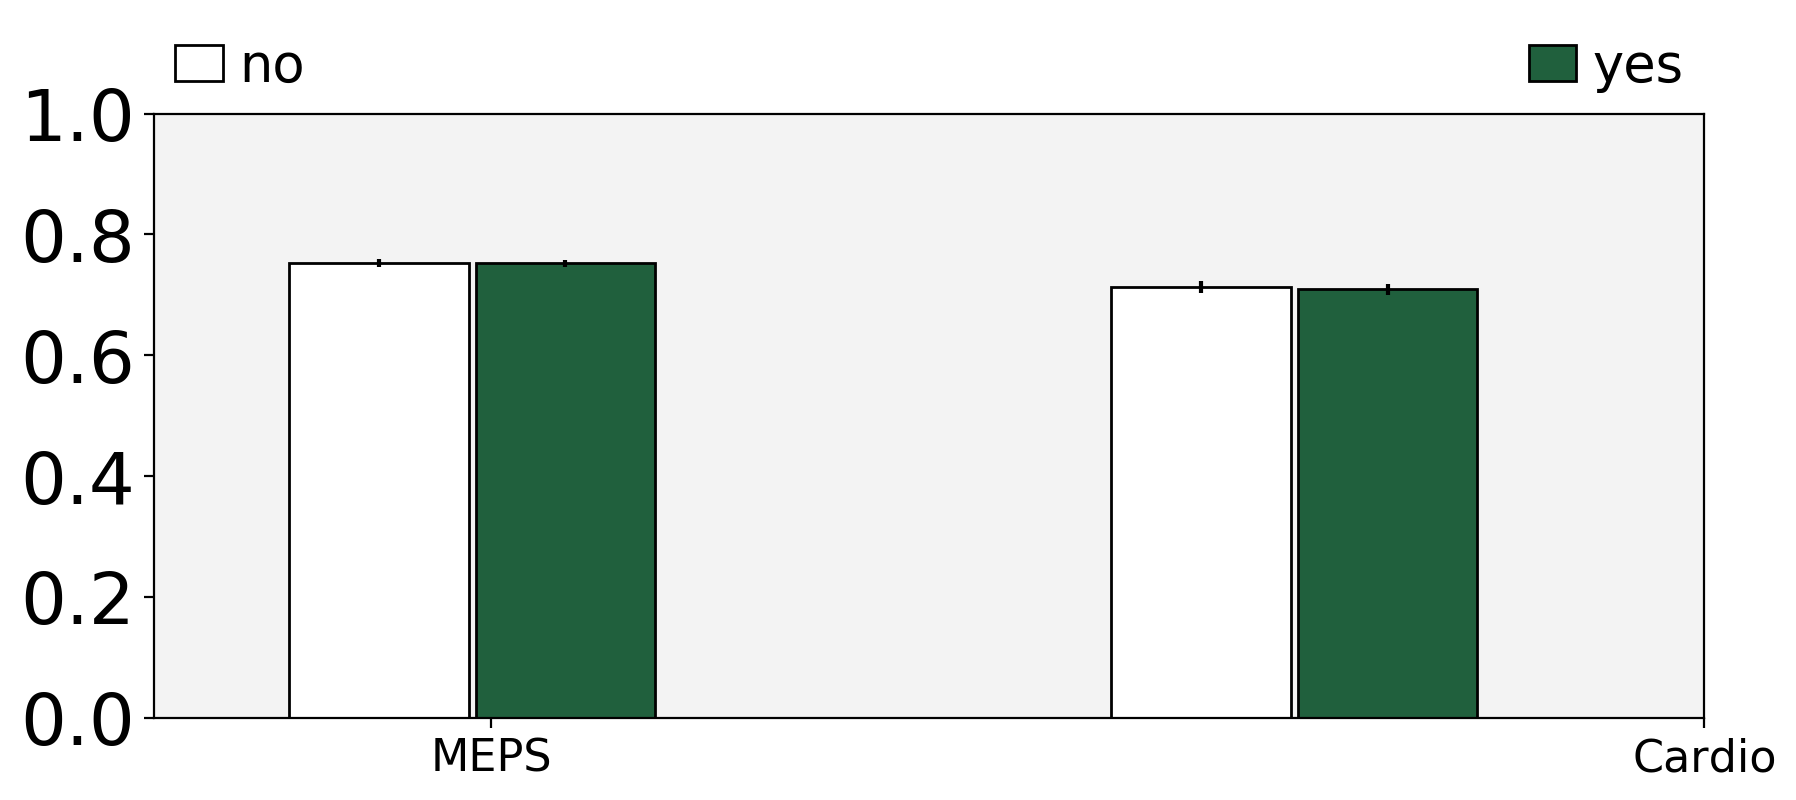

In [26]:
plot_path = 'intermediate/evals/plots/'
exp_name = 'exp6'
# initiate a new folder for the plots
exp_path = plot_path+exp_name+'/'
make_folder(exp_path)



exp_settings = ['no', 'yes']

exp_datasets = ['meps16', 'cardio']
exp_ticks = ['MEPS', 'Cardio']

exp_metric = 'BalAcc'
bar_plots(eval_df, exp_name, exp_datasets, exp_metric, exp_settings, x_ticks=exp_ticks, plot_path=exp_path)


meps16 no 0.5572941572730326
meps16 yes 0.5560540416889974
cardio no 0.6901055059053812
cardio yes 0.6829247309651836


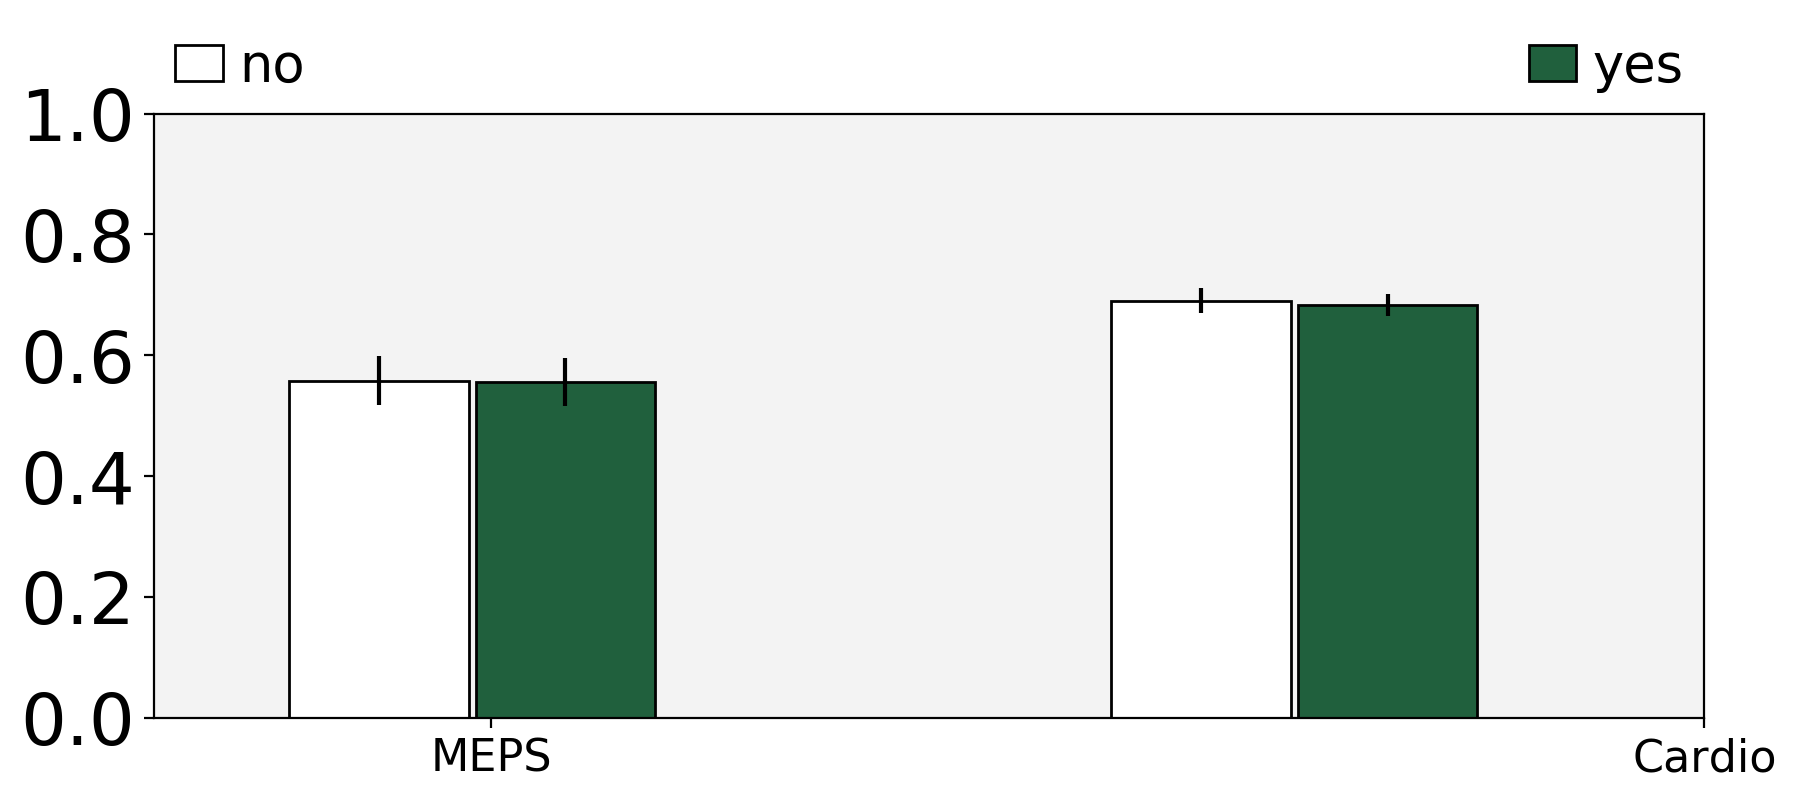

In [27]:
exp_metric = 'DI'
bar_plots(eval_df, exp_name, exp_datasets, exp_metric, exp_settings, x_ticks=exp_ticks, plot_path=exp_path)


meps16 no 0.8011497301562052
meps16 yes 0.8005089472084143
cardio no 0.8271080279692467
cardio yes 0.8274007670823795


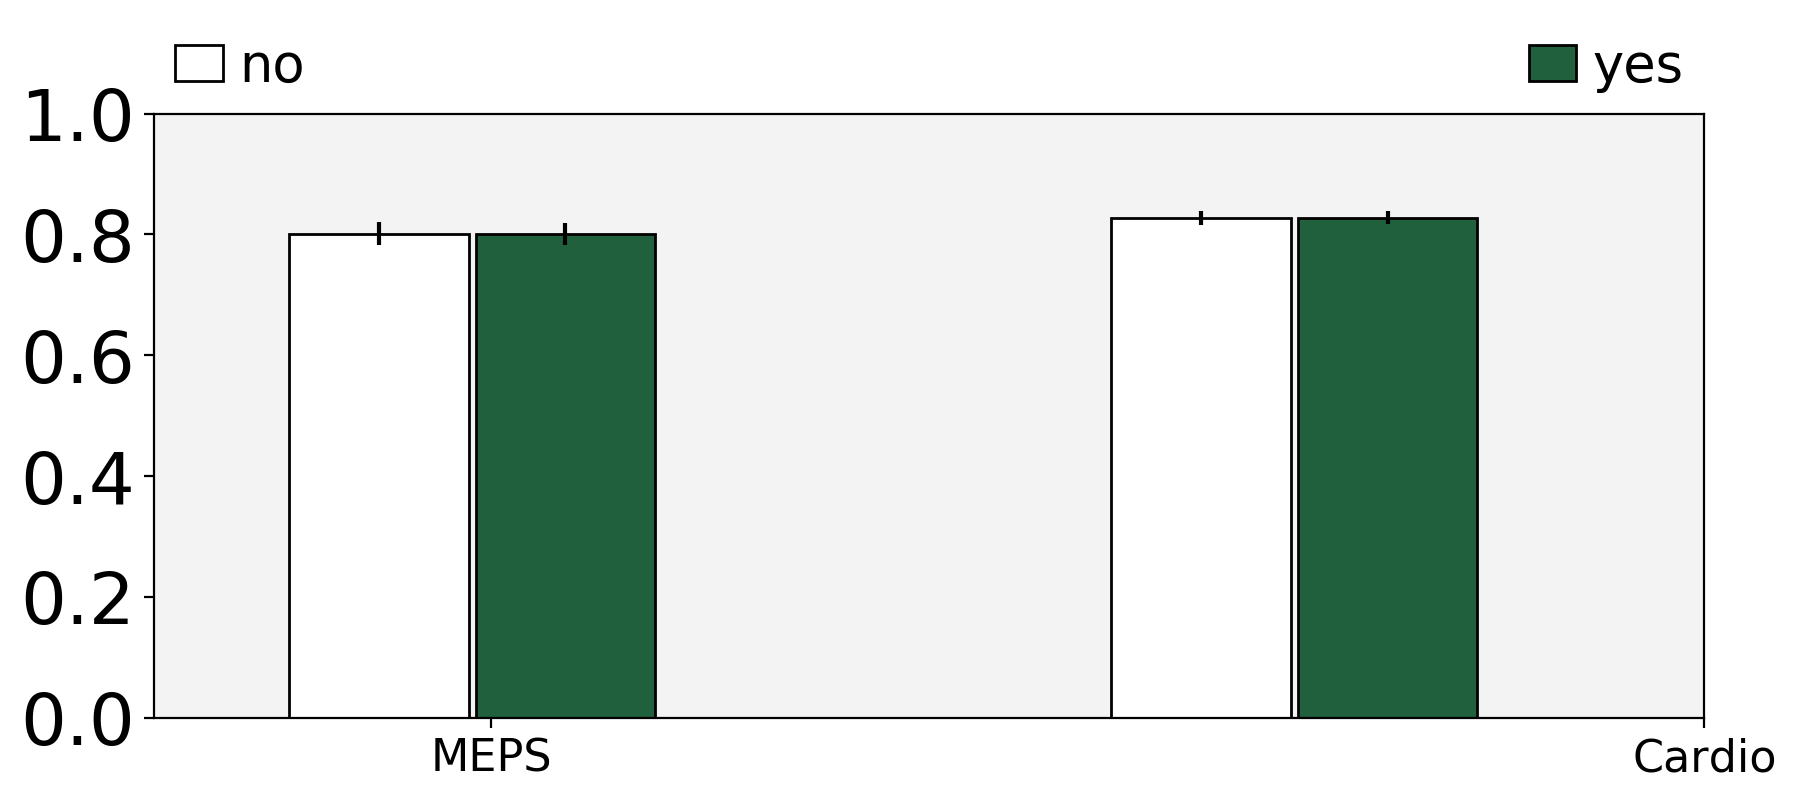

In [28]:
exp_metric = 'SPDiff'
bar_plots(eval_df, exp_name, exp_datasets, exp_metric, exp_settings, x_ticks=exp_ticks, plot_path=exp_path)


meps16 no 0.8797002034171447
meps16 yes 0.8788727366059546
cardio no 0.906135986656874
cardio yes 0.9048823080389446


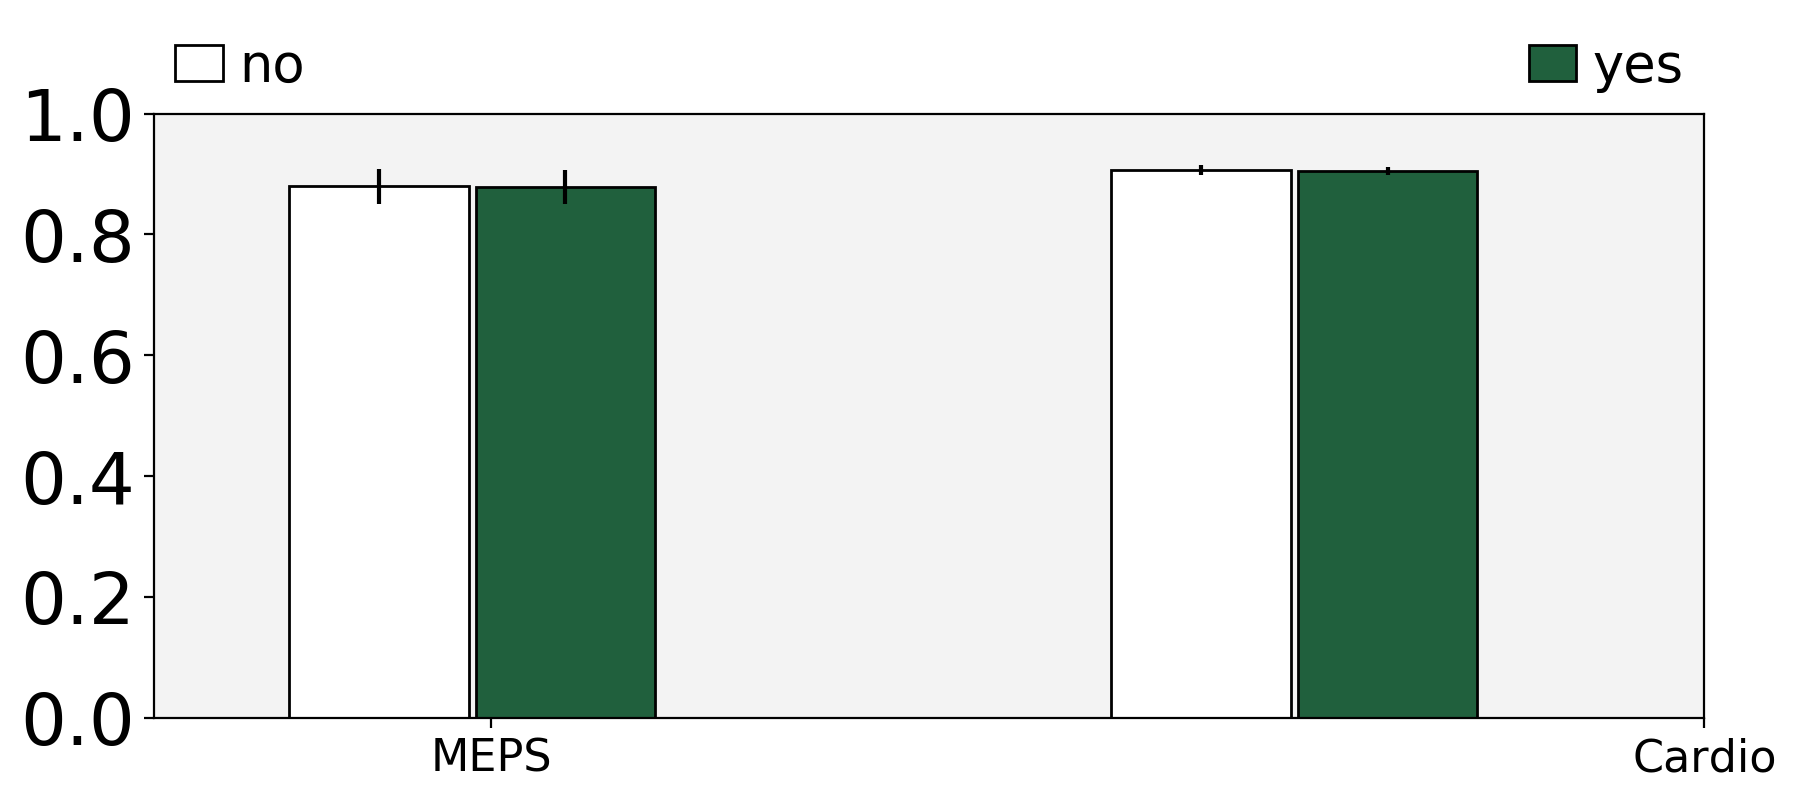

In [29]:
exp_metric = 'AvgOddsDiff'
bar_plots(eval_df, exp_name, exp_datasets, exp_metric, exp_settings, x_ticks=exp_ticks, plot_path=exp_path)
